# Imports

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
from datetime import datetime
import pandas_datareader.data as web
import scipy.optimize as sco
from scipy import stats
import scipy.stats as stats
import seaborn as sns
from yahoo_fin.stock_info import get_data
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
from progressbar import ProgressBar

### Show code on/off

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Data collection

In [2]:
def ImportDataClose(name, start, end, interval):
    n = len(name)
    ptf = pd.DataFrame()
    pbar = ProgressBar()
    errors = []
    for i in pbar(range(n)):
        try:
            tmp = pd.DataFrame(get_data(name[i], start, end, index_as_date = True, interval = interval)["adjclose"])
            tmp.rename(columns = {'adjclose':name[i]}, inplace = True)
            ptf = pd.concat([ptf, tmp], axis = 1)
        except:
            #print("error with :", name[i])
            errors.append(name[i])
            pass
    #ptf.columns = name
    return(ptf,errors)

In [3]:
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]
snp500 = first_table
snp500 = snp500['Symbol'].values.tolist()
len(snp500)

504

In [4]:
assets = snp500

In [5]:
start = datetime(2019,1,1)
end = datetime(2022,4,10)
temp_data, errors = ImportDataClose(assets, start, end, "1d")
assets = [tick for tick in assets if tick not in errors]
temp_data

100% |########################################################################|


,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,...,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
2019-01-02,170.962723,40.952248,65.785339,74.942909,309.959991,134.227905,45.854473,37.164459,224.570007,121.563072,...,18.256191,149.679993,100.250526,45.101440,63.995132,86.384338,156.240005,97.101669,38.495026,82.876381
2019-01-03,164.525299,39.963051,62.680645,72.473663,302.290009,129.645111,44.226223,37.001095,215.699997,117.892082,...,18.410906,146.539993,99.280663,44.923729,61.801342,84.211502,146.880005,95.345345,38.282089,80.011795
2019-01-04,171.293991,41.564587,64.469643,74.808548,313.440002,134.686157,45.990974,37.854195,226.190002,122.590584,...,19.176331,150.500000,103.284927,45.363331,64.408859,86.403221,152.970001,98.601692,39.457855,83.151047
2019-01-07,170.900085,42.308846,65.435104,75.900406,314.799988,135.153992,47.287735,38.044781,229.259995,121.927368,...,19.664900,151.610001,105.119019,45.166916,63.456306,86.308769,155.289993,98.639656,39.615250,83.651375
2019-01-08,171.616302,43.345127,64.649483,76.253143,318.420013,138.571976,48.720993,38.752670,232.679993,122.646645,...,20.251183,152.580002,108.412689,45.690693,64.052849,86.138718,156.330002,96.427612,39.976315,84.897263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-04,149.529999,67.059998,118.408058,160.525681,325.700012,343.447357,80.252975,90.430000,468.809998,235.179993,...,33.730000,238.309998,81.839996,72.699997,86.760002,117.699997,431.239990,125.860001,64.099998,188.740005
2022-04-05,148.899994,65.389999,119.005676,162.052689,322.660004,341.802246,79.905037,90.900002,458.579987,238.000000,...,32.980000,239.460007,79.070000,73.070000,86.889999,117.639999,423.720001,129.130005,64.400002,188.399994
2022-04-06,150.300003,64.599998,119.463852,167.486526,313.760010,339.249847,79.636635,92.830002,444.329987,237.789993,...,33.400002,239.449997,76.169998,74.989998,86.709999,118.620003,422.899994,127.849998,63.669998,191.380005
2022-04-07,149.949997,63.330002,122.880234,171.819687,317.519989,340.755341,79.636635,93.980003,452.720001,238.500000,...,33.650002,240.410004,73.970001,74.570000,86.720001,120.400002,418.399994,129.910004,63.180000,197.929993


In [6]:
errors

['BRK.B', 'BF.B']

In [7]:
data = temp_data

In [8]:
pd.DataFrame(data.isnull().sum()).loc[~(pd.DataFrame(data.isnull().sum())==0).all(axis=1)]

,0
CARR,305
CEG,768
CTVA,99
DOW,53
FOXA,47
FOX,48
OGN,596
OTIS,305


# Descriptive statistics

###### Returns

In [56]:
data_returns = data.pct_change()
data_returns = data_returns.iloc[1: , :]
print("There are", data_returns.isnull().sum().sum(),"missing data")

There are 2221 missing data


###### Daily stats

In [11]:
data_returns.describe()

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,...,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,...,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,-0.000007,0.000707,0.000912,0.001169,0.000423,0.001282,0.000937,0.001303,0.001094,0.000990,...,0.001089,0.000750,0.000303,0.000748,0.000581,0.000551,0.001500,0.000583,0.000970,0.001228
std,0.017477,0.019324,0.017567,0.017182,0.027994,0.017994,0.023299,0.017901,0.022891,0.018690,...,0.025105,0.018534,0.037440,0.016275,0.020574,0.018132,0.024995,0.021641,0.026803,0.017721
min,-0.129451,-0.086694,-0.097857,-0.162524,-0.264539,-0.083899,-0.140595,-0.100656,-0.147452,-0.152526,...,-0.237428,-0.092248,-0.244346,-0.126919,-0.120273,-0.109992,-0.155724,-0.113277,-0.120465,-0.146956
25%,-0.007809,-0.009504,-0.006872,-0.006930,-0.011211,-0.006387,-0.009906,-0.007115,-0.008897,-0.006692,...,-0.009704,-0.006966,-0.018857,-0.006036,-0.008683,-0.006511,-0.010673,-0.008464,-0.013435,-0.006805
50%,0.000426,0.001141,0.001284,0.001754,0.001424,0.001867,0.001149,0.001861,0.002204,0.001752,...,0.000875,0.000965,-0.001347,0.001054,0.000773,0.000692,0.001035,0.000313,0.000900,0.001727
75%,0.008313,0.011177,0.009455,0.009112,0.015692,0.009144,0.012622,0.009636,0.012421,0.009894,...,0.011232,0.009289,0.017801,0.008005,0.010414,0.007669,0.014648,0.009929,0.013717,0.010021
max,0.125986,0.105049,0.109360,0.087174,0.141993,0.128573,0.258755,0.102695,0.177193,0.118036,...,0.189616,0.151057,0.276883,0.112577,0.112620,0.232484,0.151937,0.155798,0.238811,0.119793


###### Annualized stats

In [12]:
stats = np.array([data_returns.std()*np.sqrt(252),data_returns.mean()*252])
desc = pd.DataFrame(stats, columns = assets, index = ["Stdev","Returns"])
desc

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,ADP,...,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Stdev,0.277439,0.306753,0.278871,0.272758,0.444397,0.285647,0.369858,0.284163,0.363379,0.296699,...,0.398532,0.294215,0.594335,0.258353,0.326597,0.287832,0.396785,0.343539,0.425479,0.28131
Returns,-0.001676,0.178099,0.229711,0.294665,0.106520,0.323051,0.236204,0.328393,0.275574,0.249524,...,0.274375,0.188954,0.076273,0.188395,0.146303,0.138898,0.377951,0.146989,0.244326,0.30938


###### Correlation matrix

In [13]:
cov_matrix = data_returns.corr()

sns.set(rc = {'figure.figsize':(30,25)})
sns.heatmap(cov_matrix.round(3),annot=True,cmap='YlOrBr').set_title('Correlation')

###### Mean-Variance framework

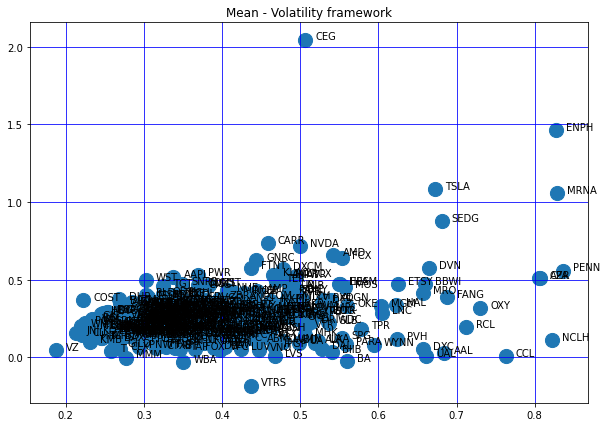

In [14]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.grid()

ax.scatter(stats[0],stats[1],marker='o',s=200)
#To start graph at 0,0
#ax.set_ylim(ymin=0)
#ax.set_xlim(xmin=0)
ax.grid( which='major', color='b', linestyle='-')
plt.title("Mean - Volatility framework")

for i, txt in enumerate(assets):
    ax.annotate(txt, (stats[0][i] ,stats[1][i]), xytext=(10,0), textcoords='offset points')

# Optimal portfolio with optimization

##### Our portfolio

In [15]:
initial_inv = 100000

In [16]:
mean_returns = data_returns.mean()
cov_matrix = data_returns.cov()
assets_num = len(assets)
trading_days = len(data)

In [17]:
risk_free_rate = 0.0027

###### Individual portfolio performance given weights

In [18]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

###### Max sharpe

In [19]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

###### Max return

In [20]:
mrp_arg = stats[1].argmax()
mrp = np.array([stats[0][mrp_arg],stats[1][mrp_arg]])

###### Min stdev

In [22]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

###### Efficient frontier

In [23]:
def efficient_return(mean_returns, cov_matrix, target):
    
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target}, 
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1} #Sum of weights equal to 1
                  )
    
    bounds = tuple((0.0,1.0) for asset in range(num_assets))
    
    
    result = sco.minimize(portfolio_volatility, #fonction a minimize, compute and return stdev given weights
                          num_assets*[1./num_assets,], #Initial guess, naive portfolio, 1/num_assets
                          args=args, #Other arguments that the function take that we don't optimize
                          method='SLSQP', #method
                          bounds=bounds, #Bonds each weights to a tuple (0,1)
                          constraints=constraints #Explained above
                         )
    
    
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

# Display final efficient frontier

In [24]:
max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=assets,columns=['allocation'])
max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
max_sharpe_allocation = max_sharpe_allocation.T
max_sharpe_allocation = max_sharpe_allocation.loc[:, (max_sharpe_allocation != 0).any(axis=0)]
max_sharpe_assets = list(max_sharpe_allocation.columns)

min_vol = min_variance(mean_returns, cov_matrix)
sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
min_vol_allocation = pd.DataFrame(min_vol.x,index=assets,columns=['allocation'])
min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
min_vol_allocation = min_vol_allocation.T
min_vol_allocation = min_vol_allocation.loc[:, (min_vol_allocation != 0).any(axis=0)]

an_vol = np.std(data_returns) * np.sqrt(252)
an_rt = mean_returns * 252

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 1.0
Annualised Volatility: 0.19


             AMZN  CHRW  CARR   CEG  EPAM  MRNA    NEM  NLOK   TER  TSN  ZION
allocation  14.92  0.75  5.78  37.6  5.52  0.67  13.27   4.9  4.28  9.6  2.71
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.39
Annualised Volatility: 0.13


            ABBV  AMZN   BMY  CHRW   CPB  CARR  CERN  CTXS   CLX   CEG  ...  \
allocation  1.48   7.1  1.94  5.82  2.33  0.79  0.62  3.04  3.47  9.81  ...   

               K   KR   NEM  NLOK   OGN  OTIS   SJM  TSN    VZ   WMT  
allocation  4.96  3.3  7.78  3.68  4.76  3.25  2.71  4.3  6.63  1.73  

[1 rows x 25 columns]
--------------------------------------------------------------------------------


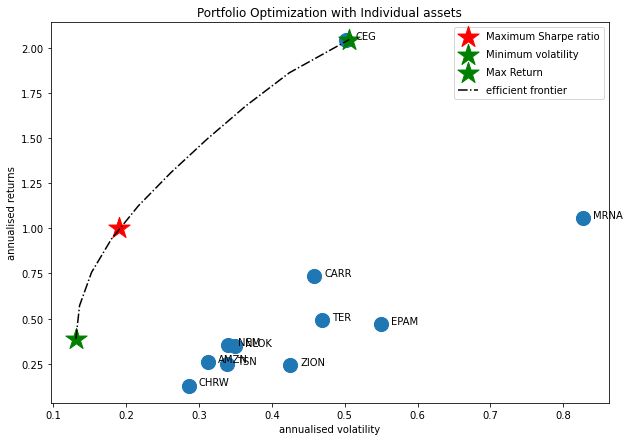

In [25]:
print ("-"*80)
print ("Maximum Sharpe Ratio Portfolio Allocation\n")
print ("Annualised Return:", round(rp,2))
print ("Annualised Volatility:", round(sdp,2))
print ("\n")
print (max_sharpe_allocation)
print ("-"*80)
print ("Minimum Volatility Portfolio Allocation\n")
print ("Annualised Return:", round(rp_min,2))
print ("Annualised Volatility:", round(sdp_min,2))
print ("\n")
print (min_vol_allocation)
print ("-"*80)


fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(an_vol[max_sharpe_assets],an_rt[max_sharpe_assets],marker='o',s=200)

for i, txt in enumerate(max_sharpe_assets):
    ax.annotate(txt, (an_vol[max_sharpe_assets][i],an_rt[max_sharpe_assets][i]), xytext=(10,0), textcoords='offset points')

ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
#ax.scatter(actual_portfolio[0], actual_portfolio[1] , marker='*',color='y',s=500, label='Actual portfolio')
ax.scatter(mrp[0], mrp[1] , marker='*',color='g',s=500, label='Max Return')

target = np.linspace(rp_min, mrp[1], 10)
efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)

ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
ax.set_title('Portfolio Optimization with Individual assets')
ax.set_xlabel('annualised volatility')
ax.set_ylabel('annualised returns')
ax.legend(labelspacing=0.8)

Text(0.5, 1.0, 'Correlation')

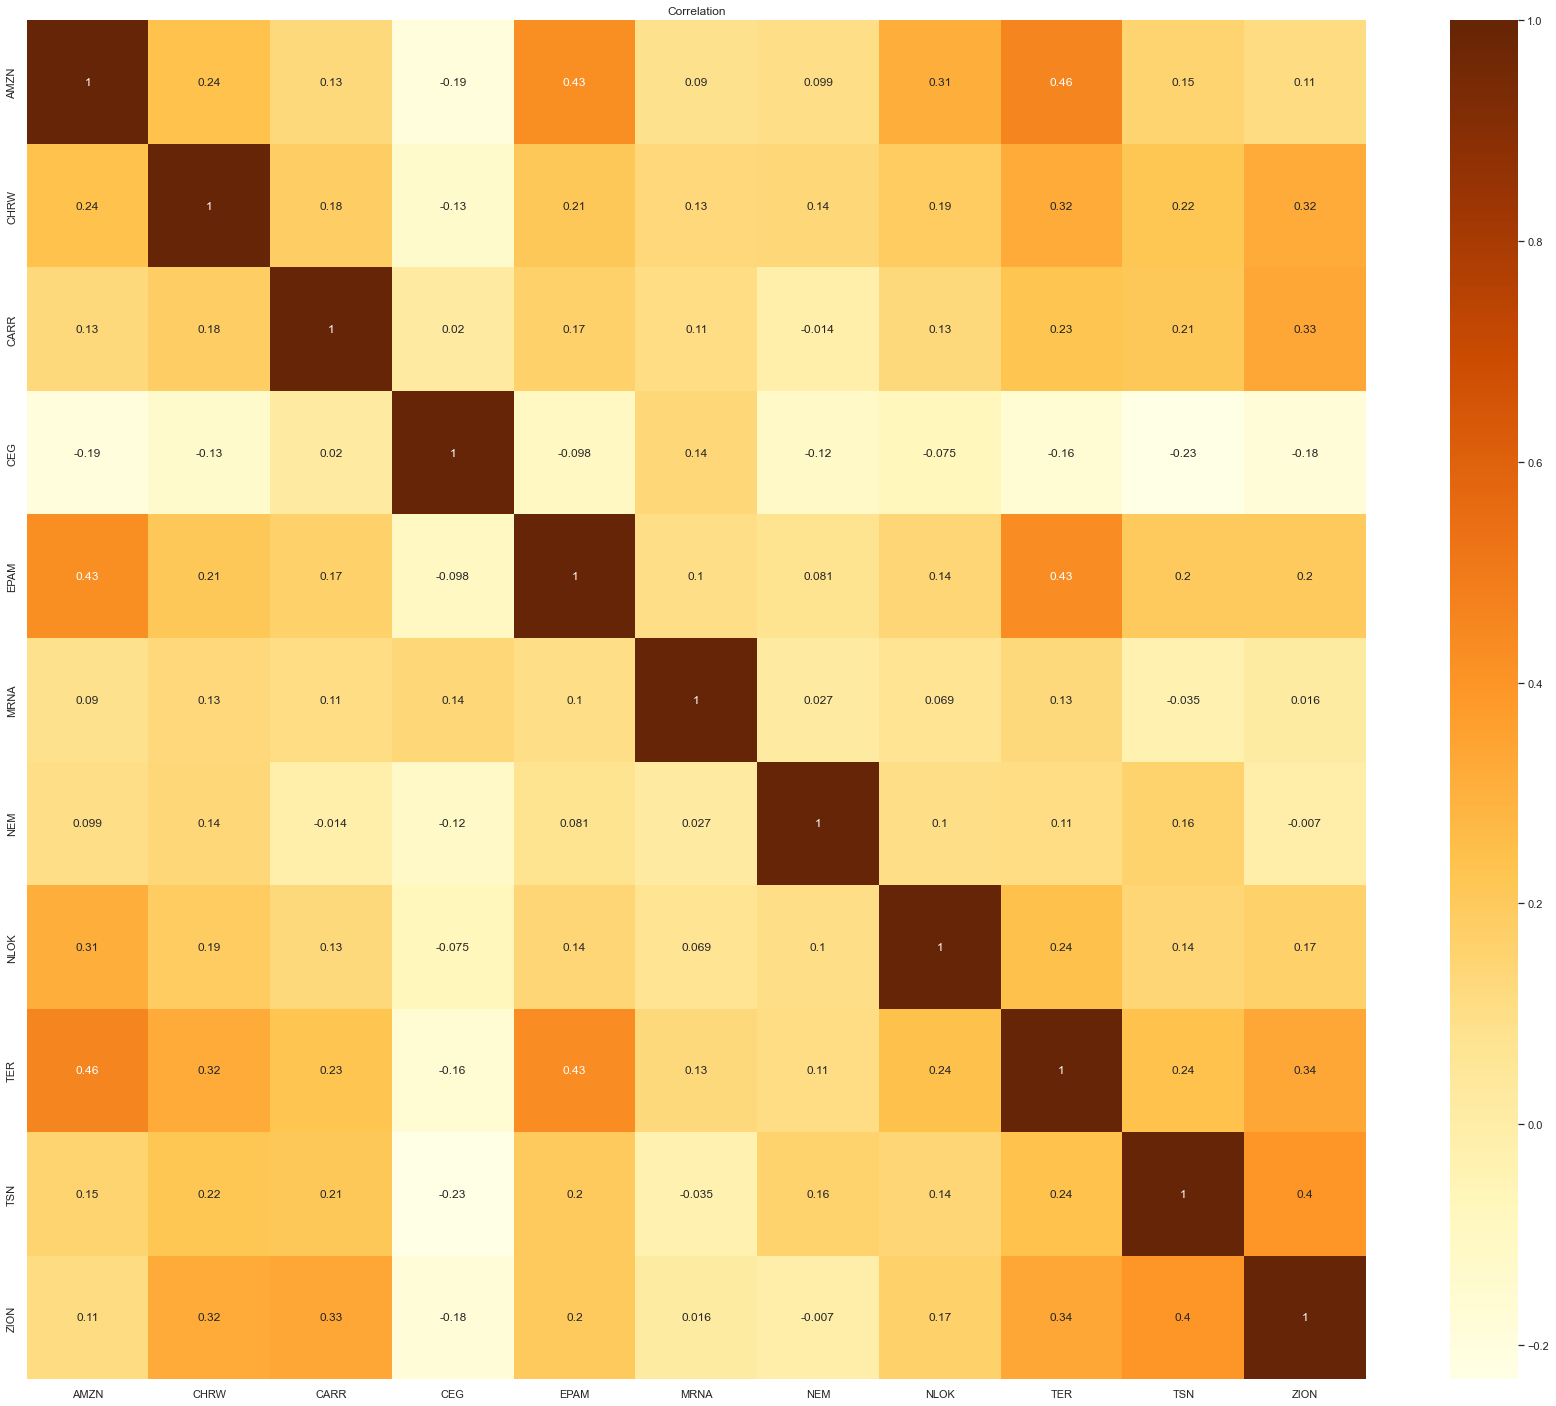

In [26]:
sns.set(rc = {'figure.figsize':(30,25)})
sns.heatmap(data_returns[max_sharpe_allocation.columns].corr().round(3),annot=True,cmap='YlOrBr').set_title('Correlation')

In [27]:
capital = 100000

In [28]:
alloc = pd.DataFrame(max_sharpe_allocation.T)
alloc = alloc.replace(0,np.nan).dropna(axis=1,how="all")
alloc = alloc.dropna()
alloc = alloc.sort_index()
alloc = alloc.reset_index()


for index, row in alloc.iterrows():
    if row['allocation'] < 0:
        alloc.drop(index, inplace=True)

alloc['alloc_pct'] = alloc.allocation / alloc.allocation.sum()
alloc['alloc_pct'] = alloc['alloc_pct']
alloc['port_pct'] = alloc.alloc_pct *1


price = []
for index, row in alloc.iterrows():
    #print(row["index"],data[row["index"]].iloc[-1])
    price.append(data[row["index"]].iloc[-1])
alloc["price"] = price


alloc["p/u"] = (alloc["port_pct"] * capital) / alloc["price"]
alloc['date'] = data.index[-1]
alloc

,index,allocation,alloc_pct,port_pct,price,p/u,date
0,AMZN,14.92,0.1492,0.1492,3089.209961,4.829714,2022-04-08
1,CARR,5.78,0.0578,0.0578,43.380001,133.241122,2022-04-08
2,CEG,37.60,0.3760,0.3760,64.019997,587.316494,2022-04-08
3,CHRW,0.75,0.0075,0.0075,102.040001,7.350059,2022-04-08
4,EPAM,5.52,0.0552,0.0552,308.690002,17.882017,2022-04-08
5,MRNA,0.67,0.0067,0.0067,160.839996,4.165631,2022-04-08
6,NEM,13.27,0.1327,0.1327,82.120003,161.592786,2022-04-08
7,NLOK,4.90,0.0490,0.0490,26.790001,182.904062,2022-04-08
8,TER,4.28,0.0428,0.0428,108.660004,39.388918,2022-04-08
9,TSN,9.60,0.0960,0.0960,92.440002,103.851144,2022-04-08


# Beta

In [60]:
port_ret = data_returns[max_sharpe_assets].mul(max_sharpe_allocation.values/100, axis=1).sum(axis = 1)
port_ret = pd.DataFrame(port_ret)

In [32]:
bench = ImportDataClose(["SPY"], start, end,"1d")
bench = bench[0]
bench_ret = bench.pct_change()
bench_ret = bench_ret.dropna()

100% |########################################################################|


In [33]:
port_ret = np.array(port_ret).reshape(-1, 1)
bench_ret = np.array(bench_ret)
port_ret = port_ret*252
bench_ret = bench_ret *252
#print(port_ret.shape)
#print(bench_ret.shape)

In [70]:
print(OLS(port_ret,bench_ret).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      0   R-squared (uncentered):                   0.620
Model:                            OLS   Adj. R-squared (uncentered):              0.620
Method:                 Least Squares   F-statistic:                              1345.
Date:                Mon, 18 Apr 2022   Prob (F-statistic):                   2.79e-175
Time:                        15:51:18   Log-Likelihood:                          3176.3
No. Observations:                 824   AIC:                                     -6351.
Df Residuals:                     823   BIC:                                     -6346.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [62]:
model = LinearRegression().fit(bench_ret,port_ret)

In [63]:
print('Portfolio Beta = ', np.round(model.coef_,4),", is the volativity of the portfolio compared to the benchmark")
print('Portfolio Alpha = ', np.round(model.intercept_,4),", is the annualized excess return of the portfolio")

Portfolio Beta =  [[0.0019]] , is the volativity of the portfolio compared to the benchmark
Portfolio Alpha =  [0.0007] , is the annualized excess return of the portfolio


C:\Users\pierre\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


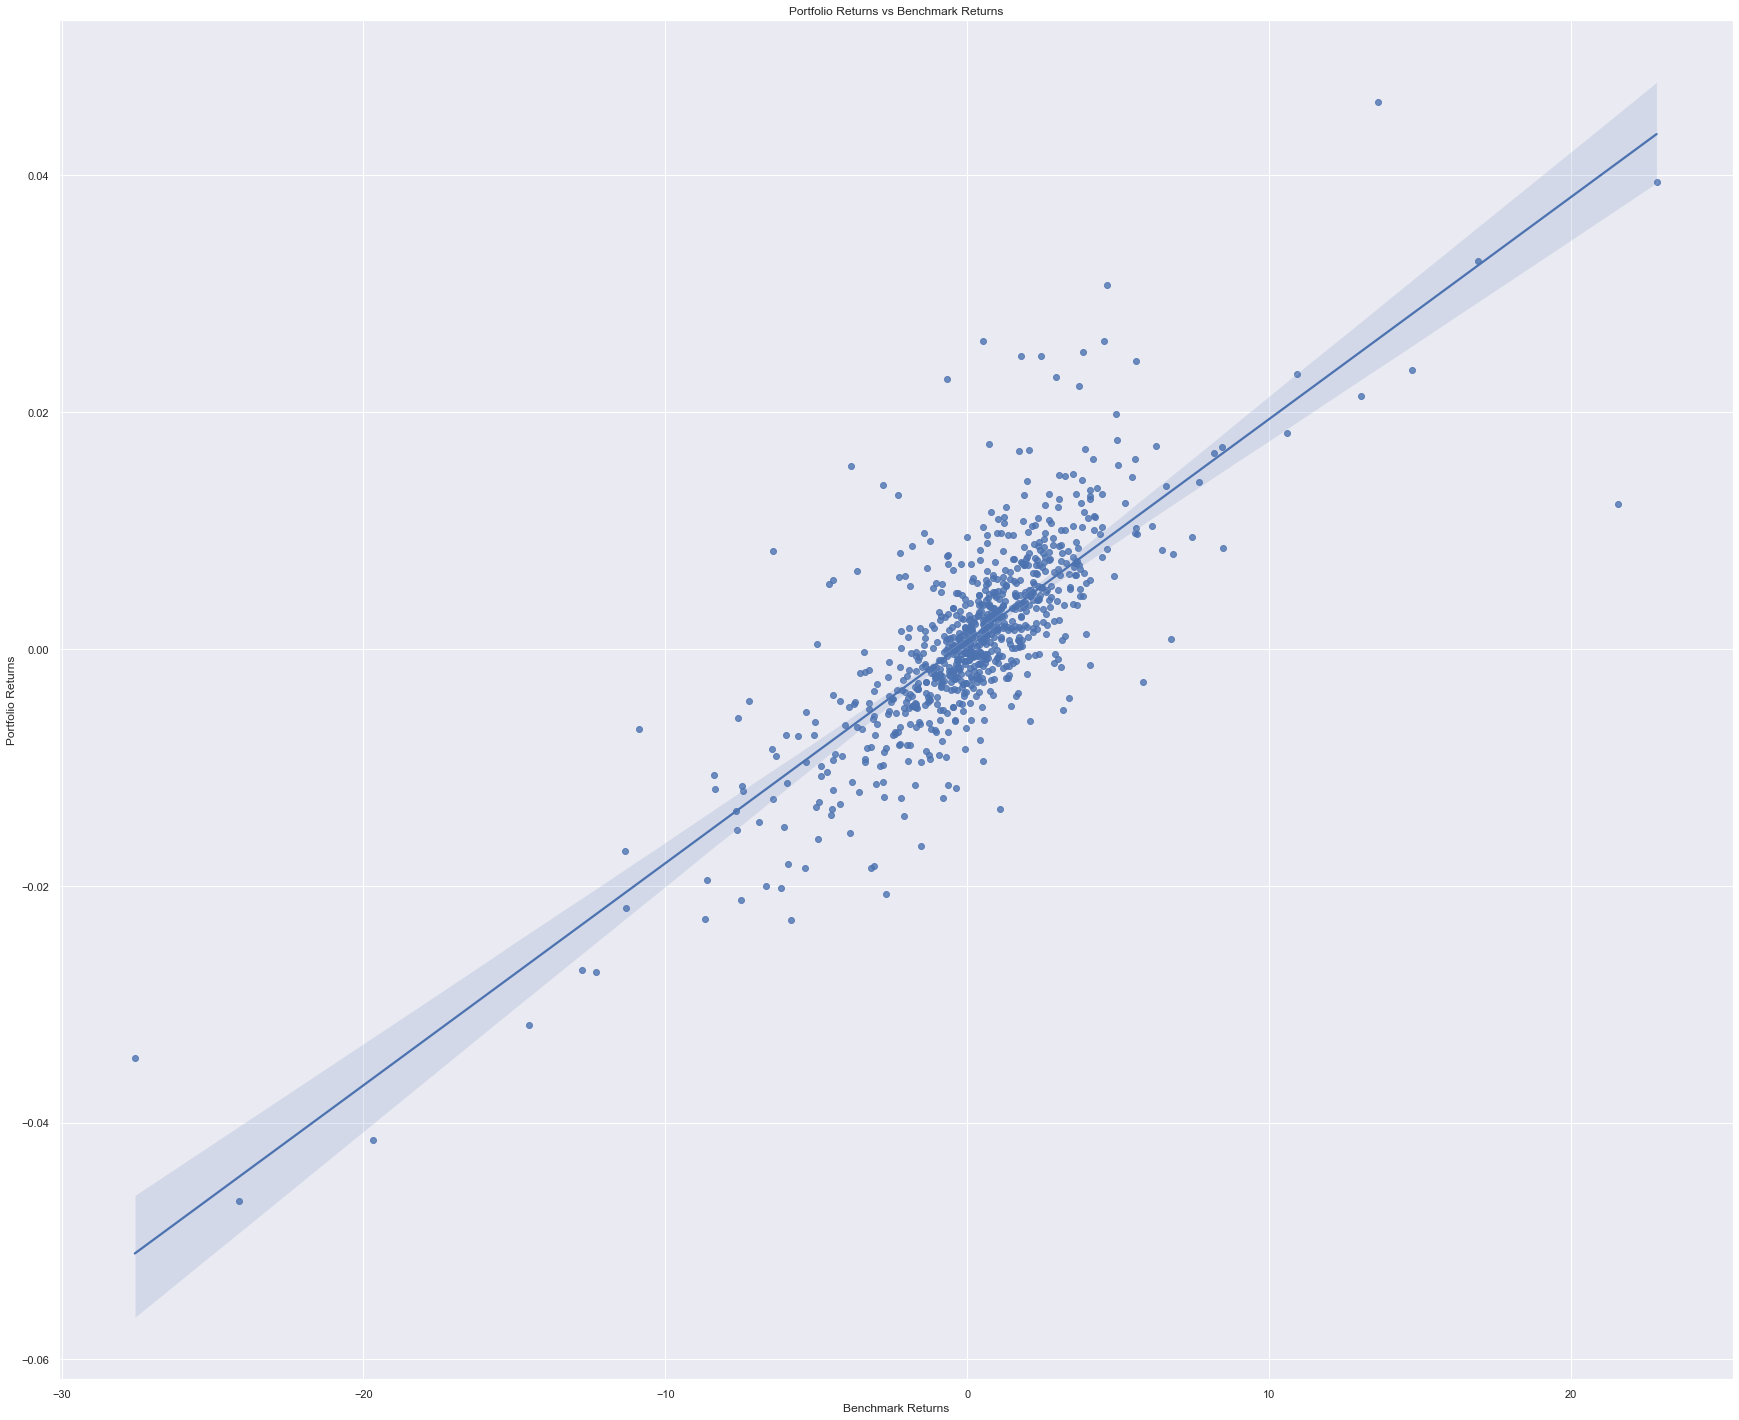

In [64]:
sns.regplot(bench_ret,port_ret)
plt.xlabel("Benchmark Returns")
plt.ylabel("Portfolio Returns")
plt.title("Portfolio Returns vs Benchmark Returns")
plt.show()

# Value at risk

In [ ]:
import scipy.stats as stats

norm_test = stats.normaltest(data_returns)[1]
normal, non_normal = 0,0
for i in range(assets_num):
    if norm_test[i] < 0.05:
        #print(assets[i], "follow a normal distribution : True")
        normal = normal+1
    else:
        #print(assets[i], "follow a normal distribution : False")
        non_normal = non_normal+1
print("normal :",normal,"/", "non_normal =",non_normal)

In [ ]:
number_sims = 10000
daily_returns = np.random.normal(rp/252, sdp/np.sqrt(252), number_sims)

In [ ]:
sns.displot(daily_returns, kde=True)
plt.axvline(np.percentile(daily_returns,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(daily_returns,95), color='r', linestyle='dashed', linewidth=2)


In [ ]:
print('Amount required to cover minimum losses for one day is %' , 
      round(100 * - np.percentile(daily_returns,5),2))